Consider the dataset Assignment01_Lasagna_Triers.xlsx
File location: https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

The file contains details of people in an area who have either tried Lasagna or not in an Italian restaurant chain. 
Train a decision tree classifier using the given data to predict whether someone has tried Lasagna or not.
Use a 80/20 split for train/test. 
1) What is the train and test accuracy score?<br>
2) Which features come out to be important?<br>
3) Does grouping 'age' and 'income' into 5 categories each, improve the  prediction score?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

pd.set_option('display.max_columns', None)

In [2]:
# Load data
lasagna_triers = pd.read_excel('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/Assignments/Assignment01_Lasagna_Triers.xlsx', sheet_name='Data')
lasagna_triers.head()

,Person,Age,Weight,Income,Pay Type,Car Value,CC Debt,Gender,Live Alone,Dwell Type,Mall Trips,Nbhd,Have Tried
0,1,48,175,65500,Hourly,2190,3510,Male,No,Home,7,East,No
1,2,33,202,29100,Hourly,2110,740,Female,No,Condo,4,East,Yes
2,3,51,188,32200,Salaried,5140,910,Male,No,Condo,1,East,No
3,4,56,244,19000,Hourly,700,1620,Female,No,Home,3,West,No
4,5,28,218,81400,Salaried,26620,600,Male,No,Apt,3,West,Yes


In [3]:
# Check shape
lasagna_triers.shape

(856, 13)

In [4]:
# Check info
lasagna_triers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Person      856 non-null    int64 
 1   Age         856 non-null    int64 
 2   Weight      856 non-null    int64 
 3   Income      856 non-null    int64 
 4   Pay Type    856 non-null    object
 5   Car Value   856 non-null    int64 
 6   CC Debt     856 non-null    int64 
 7   Gender      856 non-null    object
 8   Live Alone  856 non-null    object
 9   Dwell Type  856 non-null    object
 10  Mall Trips  856 non-null    int64 
 11  Nbhd        856 non-null    object
 12  Have Tried  856 non-null    object
dtypes: int64(7), object(6)
memory usage: 87.1+ KB


In [5]:
# Convert categorical variables to dummies
cat_var = ['Pay Type', 'Gender', 'Live Alone', 'Dwell Type', 'Nbhd']
lasagna_triers_onehot = pd.get_dummies(lasagna_triers, columns=cat_var)
lasagna_triers_onehot.sample(5)

,Person,Age,Weight,Income,Car Value,CC Debt,Mall Trips,Have Tried,Pay Type_Hourly,Pay Type_Salaried,Gender_Female,Gender_Male,Live Alone_No,Live Alone_Yes,Dwell Type_Apt,Dwell Type_Condo,Dwell Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
16,17,30,215,161600,9930,3300,5,Yes,0,1,0,1,1,0,0,0,1,0,1,0
25,26,33,220,10900,320,830,3,No,0,1,0,1,1,0,0,0,1,1,0,0
524,525,33,185,10000,790,1030,3,No,1,0,1,0,1,0,1,0,0,0,0,1
133,134,32,163,21800,890,1060,8,Yes,0,1,0,1,0,1,0,1,0,0,0,1
338,339,49,179,49400,9340,1080,8,Yes,0,1,0,1,1,0,0,0,1,1,0,0


In [6]:
# Check target
lasagna_triers_onehot['Have Tried'].value_counts()

Yes    495
No     361
Name: Have Tried, dtype: int64

In [7]:
# Map target to 1/0
lasagna_triers_onehot['Have Tried'] = lasagna_triers_onehot['Have Tried'].map({'Yes':1, 'No':0})

# Check target again
lasagna_triers_onehot['Have Tried'].value_counts()

1    495
0    361
Name: Have Tried, dtype: int64

In [8]:
# Split data
X = lasagna_triers_onehot.drop('Have Tried', axis=1)
y = lasagna_triers_onehot['Have Tried']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [9]:
# Check X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(684, 19)
(172, 19)
(684,)
(172,)


In [10]:
# Train the model
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)

[Ellipsis]

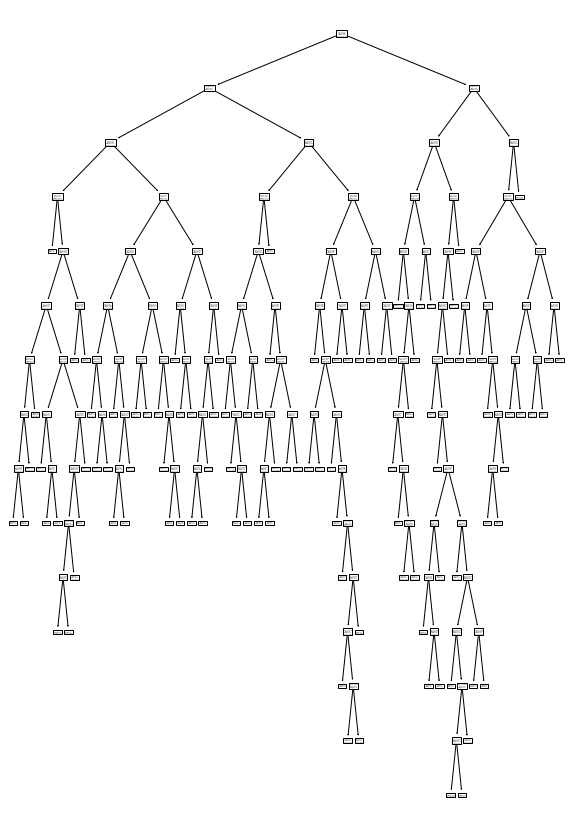

In [11]:
plt.figure(figsize=(10,15))
plot_tree(clf)
[...]

In [12]:
# Lets consolidate the results into dataframe
res_1 = pd.DataFrame({'Method' : ['Train Accuracy without cross validation', 'Test Accuracy without cross validation'], 
                    'Accuracy' : [np.round(clf.score(X_train, y_train)*100,2), np.round(clf.score(X_test, y_test)*100, 2)]})
res_1

,Method,Accuracy
0,Train Accuracy without cross validation,100.00
1,Test Accuracy without cross validation,78.49


Without cross validation, it overfits on training data.

In [13]:
# Lets try with cross validation
clf2 = DecisionTreeClassifier(random_state=42)

# Create parameter grid
params = {'criterion' : ['gini'], 'max_depth' : [2, 3, 5, 10, 20], 'min_samples_split' : [5, 10, 15, 20, 25, 30, 35, 40]}

# Create 5 fold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearch Object
clf2_gs = GridSearchCV(estimator=clf2, cv=folds, param_grid=params)

# Fit the model
clf2_gs.fit(X_train, y_train)

# Print best score
print('Best train score:', np.round(clf2_gs.best_score_*100, 2))

Best train score: 80.26


Cross validation did help reduce overfitting and the train accuracy is now 80.26%

In [14]:
# Lets check test accuracy
print('Test Accuracy after cross validation:' ,np.round(clf2_gs.score(X_test, y_test),2))

Test Accuracy after cross validation: 0.78


In [15]:
# Lets append the results
res_2 = pd.DataFrame({'Method' : ['Train Accuracy with cross validation', 'Test Accuracy with cross validation'],
                     'Accuracy' : [np.round(clf2_gs.best_score_*100, 2), np.round(clf2_gs.score(X_test, y_test)*100, 2)]})
res_1 = res_1.append(res_2, ignore_index=True)
res_1

,Method,Accuracy
0,Train Accuracy without cross validation,100.00
1,Test Accuracy without cross validation,78.49
2,Train Accuracy with cross validation,80.26
3,Test Accuracy with cross validation,77.91


### 1) What is the train and test accuracy score?

Test accuracy post cross validation is 77.9% and much closer to train accuracy of 80%

### 2) Which features come out to be important?

In [16]:
# Lets look at feature importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False)

Mall Trips           0.334300
Age                  0.111957
Nbhd_West            0.092808
Income               0.085311
CC Debt              0.061384
Weight               0.053968
Person               0.050097
Pay Type_Hourly      0.040074
Car Value            0.037596
Dwell Type_Condo     0.036685
Nbhd_East            0.023737
Live Alone_No        0.021922
Nbhd_South           0.013380
Gender_Male          0.012918
Pay Type_Salaried    0.012567
Dwell Type_Home      0.005924
Dwell Type_Apt       0.004022
Live Alone_Yes       0.001350
Gender_Female        0.000000
dtype: float64

Mall Trips which indicate no. of trips made to Mall came out to be most important feature in deciding whether a person tried Lasagna or not in Italian restaurant, compared to others. It is followed by Age of the person and those living in western neighbourhood.

### 3) Does grouping 'age' and 'income' into 5 categories each, improve the  prediction score?

In [17]:
# Lets check the distribution for Age and Income
lasagna_triers_onehot[['Age','Income']].describe()

,Age,Income
count,856.000000,856.000000
mean,38.782710,45266.939252
std,9.610763,28631.290583
min,22.000000,2600.000000
25%,31.000000,24475.000000
50%,37.500000,39950.000000
75%,46.000000,58225.000000
max,64.000000,190500.000000


In [18]:
# Lets group age into 5 categories using binning
age_sorted = lasagna_triers_onehot['Age'].sort_values()
lasagna_triers_onehot['Age_binned'] = pd.cut(age_sorted, bins=5, labels=[0, 1, 2, 3, 4])

In [19]:
# Check value counts
lasagna_triers_onehot['Age_binned'].value_counts()

1    248
2    226
0    204
3    123
4     55
Name: Age_binned, dtype: int64

In [20]:
# Lets look at the range of individual categories
print('Group 0')
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 0].min())
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 0].max())
print()
print('Group 1')
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 1].min())
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 1].max())
print()
print('Group 2')
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 2].min())
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 2].max())
print()
print('Group 3')
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 3].min())
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 3].max())
print()
print('Group 4')
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 4].min())
print(lasagna_triers_onehot['Age'][lasagna_triers_onehot['Age_binned'] == 4].max())

Group 0
22
30

Group 1
31
38

Group 2
39
47

Group 3
48
55

Group 4
56
64


In [21]:
# Lets repalce with meaningful labels for the values 0,1,2,3 and 4 as derived above
lasagna_triers_onehot['Age_binned'].replace(0, '22-30', inplace=True)
lasagna_triers_onehot['Age_binned'].replace(1, '31-38', inplace=True)
lasagna_triers_onehot['Age_binned'].replace(2, '39-47', inplace=True)
lasagna_triers_onehot['Age_binned'].replace(3, '48-55', inplace=True)
lasagna_triers_onehot['Age_binned'].replace(4, '56-64', inplace=True)

In [22]:
# Check value counts again
lasagna_triers_onehot['Age_binned'].value_counts()

31-38    248
39-47    226
22-30    204
48-55    123
56-64     55
Name: Age_binned, dtype: int64

In [23]:
# Lets group Income into 5 categories using binning
income_sorted = lasagna_triers_onehot['Income'].sort_values()
lasagna_triers_onehot['Inc_binned'] = pd.cut(income_sorted, bins=5, labels=[0, 1, 2, 3, 4])

In [24]:
# Check value counts
lasagna_triers_onehot['Inc_binned'].value_counts()

0    432
1    328
2     66
3     27
4      3
Name: Inc_binned, dtype: int64

In [25]:
# Lets look at the range of individual categories
print('Group 0')
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 0].min())
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 0].max())
print()
print('Group 1')
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 1].min())
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 1].max())
print()
print('Group 2')
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 2].min())
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 2].max())
print()
print('Group 3')
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 3].min())
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 3].max())
print()
print('Group 4')
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 4].min())
print(lasagna_triers_onehot['Income'][lasagna_triers_onehot['Inc_binned'] == 4].max())

Group 0
2600
40100

Group 1
40200
77600

Group 2
77900
114200

Group 3
118700
152800

Group 4
155600
190500


In [26]:
# Lets repalce with meaningful labels for the values 0,1,2,3 and 4 as derived above
lasagna_triers_onehot['Inc_binned'].replace(0, '<40k', inplace=True)
lasagna_triers_onehot['Inc_binned'].replace(1, '40k-77k', inplace=True)
lasagna_triers_onehot['Inc_binned'].replace(2, '77k-114k', inplace=True)
lasagna_triers_onehot['Inc_binned'].replace(3, '118k-152k', inplace=True)
lasagna_triers_onehot['Inc_binned'].replace(4, '155k-190k', inplace=True)

In [27]:
# Check value counts
lasagna_triers_onehot['Inc_binned'].value_counts()

<40k         432
40k-77k      328
77k-114k      66
118k-152k     27
155k-190k      3
Name: Inc_binned, dtype: int64

In [28]:
# Check data
lasagna_triers_onehot.sample(5)

,Person,Age,Weight,Income,Car Value,CC Debt,Mall Trips,Have Tried,Pay Type_Hourly,Pay Type_Salaried,Gender_Female,Gender_Male,Live Alone_No,Live Alone_Yes,Dwell Type_Apt,Dwell Type_Condo,Dwell Type_Home,Nbhd_East,Nbhd_South,Nbhd_West,Age_binned,Inc_binned
185,186,43,205,22600,2000,2280,4,0,0,1,0,1,1,0,0,1,0,0,1,0,39-47,<40k
265,266,40,189,107700,7160,1260,3,1,0,1,1,0,0,1,1,0,0,0,1,0,39-47,77k-114k
845,846,47,184,41200,10730,2170,9,1,0,1,1,0,0,1,0,0,1,1,0,0,39-47,40k-77k
420,421,36,181,21200,5820,830,3,0,0,1,0,1,1,0,0,1,0,1,0,0,31-38,<40k
667,668,39,190,40000,6620,90,3,0,0,1,1,0,1,0,0,0,1,1,0,0,39-47,<40k


In [29]:
# Lets check if there are any missing values
lasagna_triers_onehot.isnull().sum()

Person               0
Age                  0
Weight               0
Income               0
Car Value            0
CC Debt              0
Mall Trips           0
Have Tried           0
Pay Type_Hourly      0
Pay Type_Salaried    0
Gender_Female        0
Gender_Male          0
Live Alone_No        0
Live Alone_Yes       0
Dwell Type_Apt       0
Dwell Type_Condo     0
Dwell Type_Home      0
Nbhd_East            0
Nbhd_South           0
Nbhd_West            0
Age_binned           0
Inc_binned           0
dtype: int64

In [30]:
# Drop Age and Income since we have created bins
lasagna_triers_onehot.drop(['Age','Income'], axis=1, inplace=True)

In [31]:
# Create dummies for Age_binned, Inc_binned
bin_var = ['Age_binned', 'Inc_binned']
lasagna_triers_onehot = pd.get_dummies(lasagna_triers_onehot, columns=bin_var)
lasagna_triers_onehot.sample(5)

,Person,Weight,Car Value,CC Debt,Mall Trips,Have Tried,Pay Type_Hourly,Pay Type_Salaried,Gender_Female,Gender_Male,Live Alone_No,Live Alone_Yes,Dwell Type_Apt,Dwell Type_Condo,Dwell Type_Home,Nbhd_East,Nbhd_South,Nbhd_West,Age_binned_22-30,Age_binned_31-38,Age_binned_39-47,Age_binned_48-55,Age_binned_56-64,Inc_binned_<40k,Inc_binned_40k-77k,Inc_binned_77k-114k,Inc_binned_118k-152k,Inc_binned_155k-190k
715,716,192,7440,470,5,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
243,244,187,9070,2510,9,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
591,592,213,4020,3120,9,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
402,403,188,3820,580,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
614,615,170,2380,2720,9,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0


In [32]:
# Lets split the data
X = lasagna_triers_onehot.drop('Have Tried', axis=1)
y = lasagna_triers_onehot['Have Tried']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [33]:
# Check shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(684, 27)
(684,)
(172, 27)
(172,)


In [34]:
# Use cross validation
clf3 = DecisionTreeClassifier(random_state=100)

# Paramter grid
params = {'criterion' : ['gini'], 'max_depth' : [2, 3, 5, 10, 20], 'min_samples_split' : [5, 10, 15, 20, 25, 30, 35, 40]}

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Create GridSearch object
clf3_gs = GridSearchCV(estimator=clf3, cv=folds, param_grid=params)

# Fit the model
clf3_gs.fit(X_train, y_train)

# print the best score
print('Best Train Score after binning:', np.round(clf3_gs.best_score_*100, 2))

Best Train Score after binning: 80.12


There is no significant improvement in Train accuracy. It is 80.12% after binning, and before binning it was 80.26% 

In [35]:
# Lets check on test data
print('Test score after binning', np.round(clf3_gs.score(X_test, y_test)*100, 2))

Test score after binning 78.49


Test Accuracy has dropped a little to 78.49%, but still closer to Train Accuracy.

In [36]:
# Lets append the results
res_3 = pd.DataFrame({'Method' : ['Train Accuracy with cross validation and binning', 'Test Accuracy with cross validation and binning'],
                      'Accuracy' : [np.round(clf3_gs.best_score_*100, 2), np.round(clf3_gs.score(X_test, y_test)*100, 2)]})
res_1 = res_1.append(res_3, ignore_index=True)
res_1

,Method,Accuracy
0,Train Accuracy without cross validation,100.00
1,Test Accuracy without cross validation,78.49
2,Train Accuracy with cross validation,80.26
3,Test Accuracy with cross validation,77.91
4,Train Accuracy with cross validation and binning,80.12
5,Test Accuracy with cross validation and binning,78.49


There is no significant improvement in Train and Test accuracies without and with binning. Test accuracy did improve slightly after binning.